In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## Feature Engineering

In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [5]:
df['age'] = 2022 - df['Year_Birth']
df['joint_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kid'] = df['Kidhome'] + df['Teenhome']
df['is_parent'] = np.where(df['total_kid'] > 0,1,0)

In [6]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,55,0,0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,60,2,1
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,48,0,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,30,1,1
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,33,1,1


In [7]:
## Amount spent
df['total_spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

## Total accept campaign
df['total_accept_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

## Total transaction
df['total_transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [8]:
#age group
df.loc[(df['age'] >= 0) & (df['age'] < 26), 'age_group'] = 'gen_z'
df.loc[(df['age'] >= 26) & (df['age'] < 42), 'age_group'] = 'millenials'
df.loc[(df['age'] >= 42) & (df['age'] < 58), 'age_group'] = 'gen_x'
df.loc[(df['age'] >= 58), 'age_group'] = 'boomers'

In [9]:
df['NumWebVisitsMonth'].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

In [10]:
# conversion rate
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df['conversion_rate'] = df.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis = 1)

In [11]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,55,0,0,1617000,0,25,boomers,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,60,2,1,27000,0,6,boomers,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,48,0,0,776000,0,21,gen_x,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,30,1,1,53000,0,8,millenials,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,33,1,1,422000,0,19,millenials,3.800000


In [12]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


<AxesSubplot:>

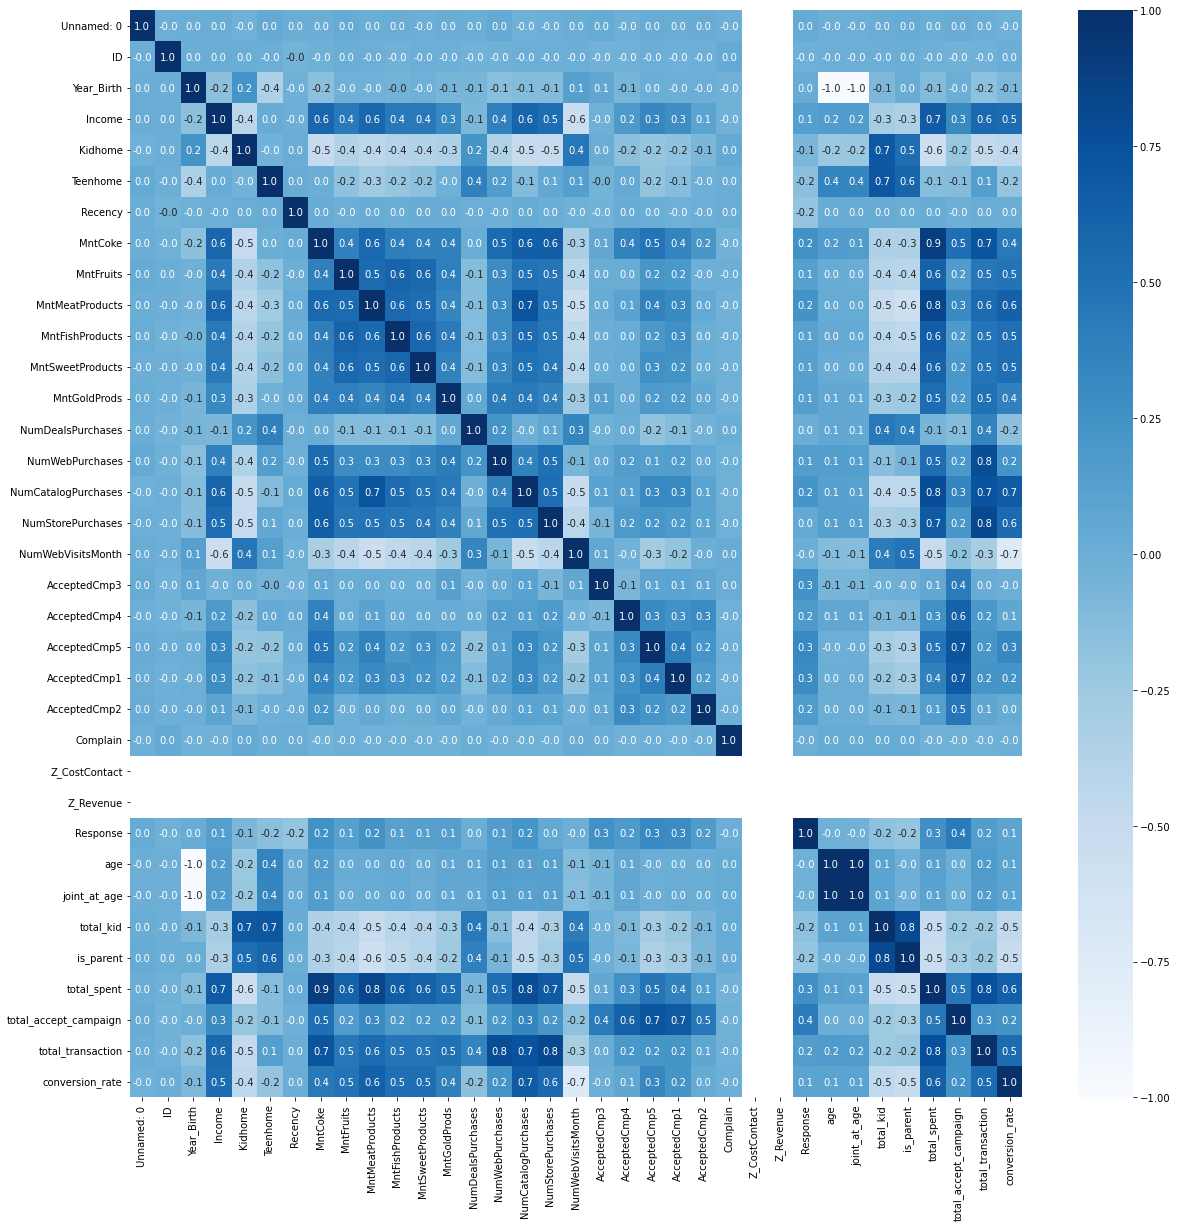

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.1f')

## Age vs Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

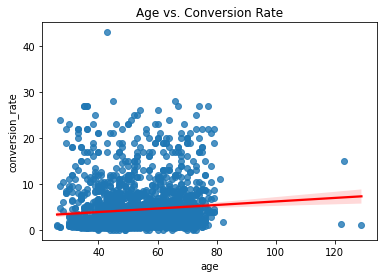

In [14]:
sns.regplot(x = df['age'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Age vs. Conversion Rate')
plt.show
#plt.savefig('Age vs Conversion Rate.png')

<function matplotlib.pyplot.show(close=None, block=None)>

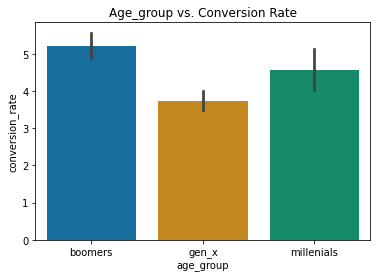

In [15]:
sns.barplot(x = df['age_group'], y = df['conversion_rate'],palette = 'colorblind')
plt.title('Age_group vs. Conversion Rate')
plt.show
#plt.savefig('Age_group vs Conversion Rate.png')

## Spending vs. Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

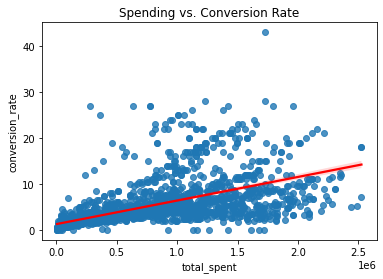

In [16]:
sns.regplot(x = df['total_spent'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Spending vs. Conversion Rate')
plt.show
#plt.savefig('Spending vs Conversion Rate.png')

## Visit vs. Conversion Rate

<function matplotlib.pyplot.show(close=None, block=None)>

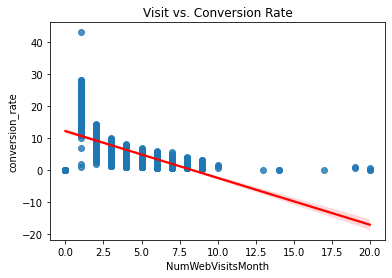

In [17]:
visit_vs_conversion = sns.regplot(x = df['NumWebVisitsMonth'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Visit vs. Conversion Rate')
plt.show
#plt.savefig('Visit vs Conversion Rate.png')

## Transaction vs. Conversion Rate

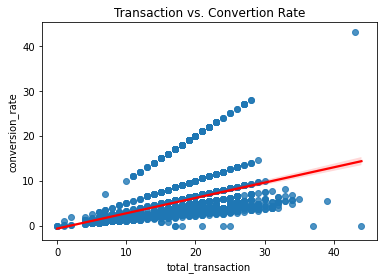

In [18]:
sns.regplot(x = df['total_transaction'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Transaction vs. Convertion Rate')
plt.show()
#plt.savefig('Transaction vs Conversion Rate.png')

## Visit vs. Transaction

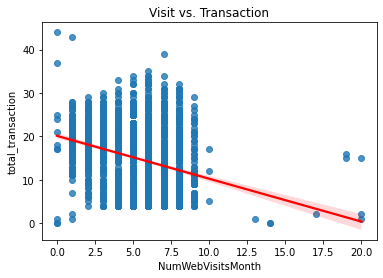

In [19]:
sns.regplot(x = df['NumWebVisitsMonth'], y = df['total_transaction'],line_kws = {'color':'red'})
plt.title('Visit vs. Transaction')
plt.show()
#plt.savefig('Visit vs Transaction.png')

## Campaign vs. Conversion Rate

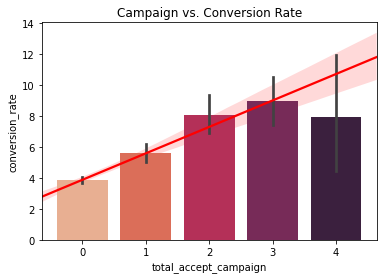

In [20]:
sns.barplot(x = df['total_accept_campaign'], y = df['conversion_rate'],palette='rocket_r')
sns.regplot(x=df['total_accept_campaign'],y = df['conversion_rate'],line_kws ={'color':'red'},
            data=df, scatter=False, truncate=False)
plt.title('Campaign vs. Conversion Rate')
plt.show()
#plt.savefig('Campaign vs Conversion Rate.png')

## Income vs. Conversion Rate

(0.0, 120000000.0)

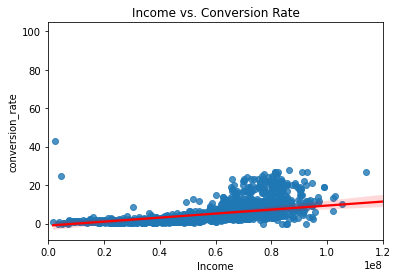

In [21]:
plot = sns.regplot(x = df['Income'], y = df['conversion_rate'],line_kws = {'color':'red'})
plt.title('Income vs. Conversion Rate')
plot.set_xlim(0, 120000000)
#plt.savefig('Income vs Conversion Rate.png')

## Age Group vs Campaign

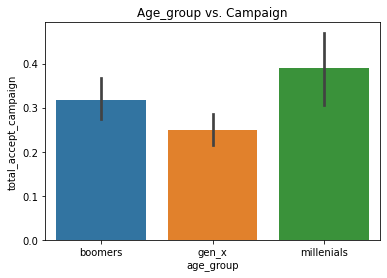

In [22]:
sns.barplot(x = df['age_group'], y = df['total_accept_campaign'])
plt.title('Age_group vs. Campaign')
plt.show()

## Data Cleansing

In [23]:
df.isna().sum().sort_values(ascending = False)

Income                   24
Unnamed: 0                0
Response                  0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
age                       0
NumWebVisitsMonth         0
joint_at_age              0
total_kid                 0
is_parent                 0
total_spent               0
total_accept_campaign     0
total_transaction         0
age_group                 0
AcceptedCmp3              0
NumStorePurchases         0
ID                        0
NumCatalogPurchases       0
Year_Birth                0
Education                 0
Marital_Status            0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds        

In [24]:
df.loc[df.Income.isnull()]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate
10,10,1994,1983,S1,Menikah,NaN,1,0,2013-11-15,11,5000,5000,6000,0,2000,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0,39,30,1,1,19000,0,4,millenials,0.571429
27,27,5255,1986,S1,Lajang,NaN,1,0,2013-02-20,19,5000,1000,3000,3000,263000,362000,0,27,0,0,1,0,0,0,0,0,0,3,11,0,36,27,1,1,637000,0,27,millenials,27.000000
43,43,7281,1959,S3,Lajang,NaN,0,0,2013-05-11,80,81000,11000,50000,3000,2000,39000,1,1,3,4,2,0,0,0,0,0,0,3,11,0,63,54,0,0,186000,0,9,boomers,4.500000
48,48,7244,1951,S1,Lajang,NaN,2,1,2014-01-01,96,48000,5000,48000,6000,10000,7000,3,2,1,4,6,0,0,0,0,0,0,3,11,0,71,63,3,1,124000,0,10,boomers,1.666667
58,58,8557,1982,S1,Lajang,NaN,1,0,2013-06-17,57,11000,3000,22000,2000,2000,6000,2,2,0,3,6,0,0,0,0,0,0,3,11,0,40,31,1,1,46000,0,7,millenials,1.166667
71,71,10629,1973,D3,Menikah,NaN,1,0,2012-09-14,25,25000,3000,43000,17000,4000,17000,3,3,0,3,8,0,0,0,0,0,0,3,11,0,49,39,1,1,109000,0,9,gen_x,1.125000
90,90,8996,1957,S3,Menikah,NaN,2,1,2012-11-19,4,230000,42000,192000,49000,37000,53000,12,7,2,8,9,0,0,0,0,0,0,3,11,0,65,55,3,1,603000,0,29,boomers,3.222222
91,91,9235,1957,S1,Lajang,NaN,1,1,2014-05-27,45,7000,0,8000,2000,0,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0,65,57,2,1,18000,0,4,boomers,0.571429
92,92,5798,1973,S2,Bertunangan,NaN,0,0,2013-11-23,87,445000,37000,359000,98000,28000,18000,1,2,4,8,1,0,0,0,0,0,0,3,11,0,49,40,0,0,985000,0,15,gen_x,15.000000
128,128,8268,1961,S3,Menikah,NaN,0,1,2013-11-07,23,352000,0,27000,10000,0,15000,3,6,1,7,6,0,0,0,0,0,0,3,11,0,61,52,1,1,404000,0,17,boomers,2.833333


In [25]:
df_clean = df.copy()

In [26]:
# Drop Missing Value from Income Column
df_clean = df_clean.dropna(subset=['Income'])
df_clean.isna().sum()

Unnamed: 0               0
ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntCoke                  0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
age                      0
joint_at_age             0
total_kid                0
is_parent                0
total_spent              0
total_accept_campaign    0
total_transaction        0
a

In [27]:
# Check Duplicate data
df_clean.duplicated().sum()

0

## Drop unnecessary Column

In [28]:
df_clean = df_clean.drop(columns=['Unnamed: 0','Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'])

In [29]:
df_clean.shape

(2216, 34)

## Exploratory Data Analysis

### Statistical Summary

In [30]:
cat = df_clean.select_dtypes(include = 'object')
numerical = df_clean.select_dtypes(exclude = 'object')

In [31]:
cat_cols = cat.columns.to_list()
print('Data category: ',cat_cols)

Data category:  ['Education', 'Marital_Status', 'age_group']


In [32]:
numerical_cols = numerical.columns.to_list()
print('Data numerik: ',numerical_cols)

Data numerik:  ['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'age', 'joint_at_age', 'total_kid', 'is_parent', 'total_spent', 'total_accept_campaign', 'total_transaction', 'conversion_rate']


In [33]:
df_clean[numerical_cols].describe()

,ID,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,conversion_rate
count,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000
mean,5588.353339,5.224725e+07,0.441787,0.505415,49.012635,3.050916e+05,26356.046931,1.669959e+05,37637.635379,27028.880866,43965.252708,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,53.179603,44.208032,0.947202,0.714350,6.070754e+05,0.298285,14.880866,4.390755
std,3249.376275,2.517308e+07,0.536896,0.544181,28.948352,3.373279e+05,39793.916518,2.242833e+05,54752.082415,41072.045667,51815.414374,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,12.023812,0.749062,0.451825,6.029005e+05,0.679209,7.670957,4.888816
min,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,2814.750000,3.530300e+07,0.000000,0.000000,24.000000,2.400000e+04,2000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,36.000000,0.000000,0.000000,6.900000e+04,0.000000,8.000000,1.222222
50%,5458.500000,5.138150e+07,0.000000,0.000000,49.000000,1.745000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24500.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,43.000000,1.000000,1.000000,3.965000e+05,0.000000,15.000000,2.612500
75%,8421.750000,6.852200e+07,1.000000,1.000000,74.000000,5.050000e+05,33000.000000,2.322500e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,54.000000,1.000000,1.000000,1.048000e+06,0.000000,21.000000,5.400000
max,11191.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,262000.000000,321000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


In [34]:
df_clean[cat_cols].describe()

,Education,Marital_Status,age_group
count,2216,2216,2216
unique,5,6,3
top,S1,Menikah,gen_x
freq,1116,857,1061


In [35]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value count kolom age_group:
gen_x         1069
boomers        786
millenials     385
Name: age_group, dtype: int64



## Feature Encoding

In [36]:
# Label encoder for education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df_clean['education_mapped'] = df_clean['Education'].map(mapping_education)

In [37]:
# One hot encoder
for cat in ['Marital_Status','age_group','is_parent']:
    onehots = pd.get_dummies(df_clean[cat], prefix = cat)
    df_clean = df_clean.join(onehots)

In [38]:
df_cleaned = df_clean[['ID','Education','Marital_Status','Income','Recency','NumWebVisitsMonth','Complain','Response','age','joint_at_age','total_kid','is_parent','total_spent',
                       'total_accept_campaign','total_transaction','age_group','conversion_rate']].copy()

In [39]:
df_cleaned

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate
0,5524,S1,Lajang,58138000.0,58,7,0,1,65,55,0,0,1617000,0,25,boomers,3.571429
1,2174,S1,Lajang,46344000.0,38,5,0,0,68,60,2,1,27000,0,6,boomers,1.200000
2,4141,S1,Bertunangan,71613000.0,26,4,0,0,57,48,0,0,776000,0,21,gen_x,5.250000
3,6182,S1,Bertunangan,26646000.0,26,6,0,0,38,30,1,1,53000,0,8,millenials,1.333333
4,5324,S3,Menikah,58293000.0,94,5,0,0,41,33,1,1,422000,0,19,millenials,3.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,S1,Menikah,61223000.0,46,5,0,0,55,46,1,1,1341000,0,18,gen_x,3.600000
2236,4001,S3,Bertunangan,64014000.0,56,7,0,0,76,68,3,1,444000,1,22,boomers,3.142857
2237,7270,S1,Cerai,56981000.0,91,6,0,0,41,33,0,0,1241000,1,19,millenials,3.166667
2238,8235,S2,Bertunangan,69245000.0,8,3,0,0,66,58,1,1,843000,0,23,boomers,7.666667


## Feature Standarization

In [40]:
numerical_feature = ['Income','Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age','joint_at_age', 
            'total_kid', 'total_spent','total_accept_campaign', 'total_transaction','conversion_rate']

In [41]:
from sklearn.preprocessing import StandardScaler
df_std = df_clean.copy()
ss = StandardScaler()

for col in numerical_feature:
    df_std[col] = ss.fit_transform(df_std[[col]])
    
display(df_std.shape,df_std.head(5))

(2216, 46)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,joint_at_age,total_kid,is_parent,total_spent,total_accept_campaign,total_transaction,age_group,conversion_rate,education_mapped,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,age_group_boomers,age_group_gen_x,age_group_millenials,is_parent_0,is_parent_1
0,5524,S1,Lajang,0.234063,0,0,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,1,0.986443,0.897752,-1.264803,0,1.675488,-0.439265,1.319446,boomers,-0.167630,2,0,0,0,0,1,0,1,0,0,1,0
1,2174,S1,Lajang,-0.234559,1,1,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0,1.236801,1.313688,1.405806,1,-0.962358,-0.439265,-1.157987,boomers,-0.652811,2,0,0,0,0,1,0,1,0,0,0,1
2,4141,S1,Bertunangan,0.769478,0,0,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0,0.318822,0.315443,-1.264803,0,0.280250,-0.439265,0.797881,gen_x,0.175797,2,1,0,0,0,0,0,0,1,0,1,0
3,6182,S1,Bertunangan,-1.017239,1,0,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0,-1.266777,-1.181925,0.070501,1,-0.919224,-0.439265,-0.897205,millenials,-0.625532,2,1,0,0,0,0,0,0,0,1,0,1
4,5324,S3,Menikah,0.240221,1,0,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0,-1.016420,-0.932363,0.070501,1,-0.307044,-0.439265,0.537099,millenials,-0.120865,4,0,0,0,0,0,1,0,0,1,0,1
